<a href="https://colab.research.google.com/github/vanshika7-max/Bike-Sharing-Demand-Prediction/blob/main/Vanshika_Raj_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


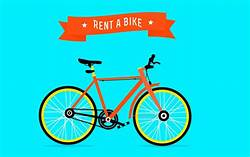

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **Importing Library and connecting drive**

In [ ]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [ ]:

 from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g5fAPmHQRUhRz4VyN8SF6ahQicX0-_zNEknOHN7VL4nzlkXrZEBwL4


##Exploratory Data Analysis(EDA)

In [ ]:
# Load the dataset
SeoulBikeData = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/SeoulBikeData.csv',sep=',',encoding='latin')


# Print the first 5 rows of the dataframe.
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
SeoulBikeData.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
SeoulBikeData.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
SeoulBikeData.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
SeoulBikeData.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 



In [ ]:
SeoulBikeData = SeoulBikeData[SeoulBikeData['Functioning_Day'] == 'Yes']
# # bike_data = bike_data[bike_data['Functioning_Day'] == 'Yes']
SeoulBikeData.drop('Functioning_Day', axis = 1, inplace =True)


In [ ]:
SeoulBikeData

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [ ]:
def Functioning_Day(row):
  if str(row) == 'Yes':
    return 1
  else :
    return 0
  

In [ ]:
def Holiday_label(row):
  if str(row) == 'Holiday':
    return 1
  else :
    return 0
  

In [ ]:
SeoulBikeData['Holiday']=SeoulBikeData.apply(lambda row : Holiday_label(row['Holiday']),axis=1)

SeoulBikeData['Holiday'].value_counts()

0    8057
1     408
Name: Holiday, dtype: int64

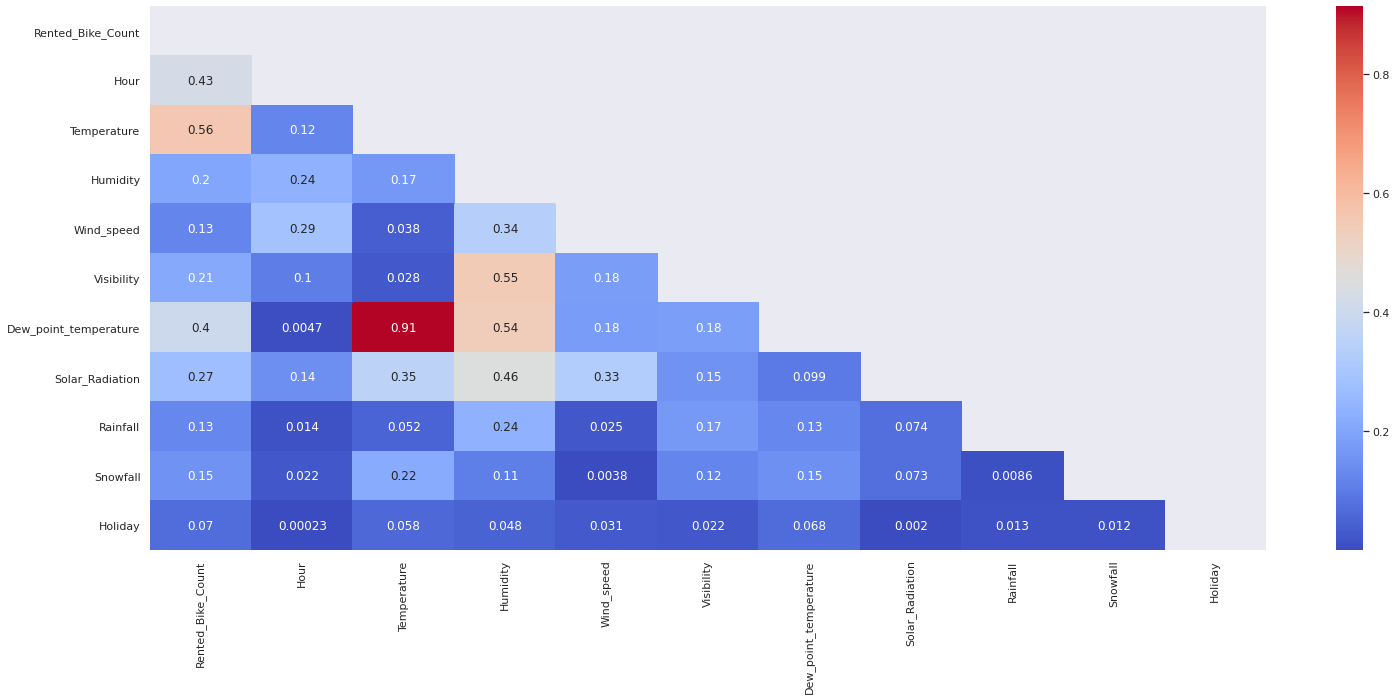

In [ ]:
plt.figure(figsize=(25,10))
cor=SeoulBikeData.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')


From the above  graph, we can see that Temperature and Dew_point_temperature is highy correlated, keeping the factor of 0.91 .
And, then we have hour in the graph which is having good correlation with our dependent variable.

In [ ]:
SeoulBikeData.Seasons

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8465, dtype: object

In [ ]:
def Seasons_label(row):
  if str(row) == 'Winter':
    return 0
  elif str(row) == 'Autumn':
    return 1
  elif str(row) == 'Spring':
    return 2
  elif  str(row) == 'Summer':
    return 3
  

In [ ]:
SeoulBikeData['Seasons']=SeoulBikeData.apply(lambda row : Seasons_label(row['Seasons']),axis=1)

SeoulBikeData['Seasons'].value_counts()

3    2208
2    2160
0    2160
1    1937
Name: Seasons, dtype: int64

In [ ]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8465 non-null   object 
 1   Rented_Bike_Count      8465 non-null   int64  
 2   Hour                   8465 non-null   int64  
 3   Temperature            8465 non-null   float64
 4   Humidity               8465 non-null   int64  
 5   Wind_speed             8465 non-null   float64
 6   Visibility             8465 non-null   int64  
 7   Dew_point_temperature  8465 non-null   float64
 8   Solar_Radiation        8465 non-null   float64
 9   Rainfall               8465 non-null   float64
 10  Snowfall               8465 non-null   float64
 11  Seasons                8465 non-null   int64  
 12  Holiday                8465 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 925.9+ KB


In [ ]:
def Function_day(row):
  if str(row) == 'Yes':
    return 1
  else :
    return 0
  

In [ ]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8465 non-null   object 
 1   Rented_Bike_Count      8465 non-null   int64  
 2   Hour                   8465 non-null   int64  
 3   Temperature            8465 non-null   float64
 4   Humidity               8465 non-null   int64  
 5   Wind_speed             8465 non-null   float64
 6   Visibility             8465 non-null   int64  
 7   Dew_point_temperature  8465 non-null   float64
 8   Solar_Radiation        8465 non-null   float64
 9   Rainfall               8465 non-null   float64
 10  Snowfall               8465 non-null   float64
 11  Seasons                8465 non-null   int64  
 12  Holiday                8465 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 925.9+ KB


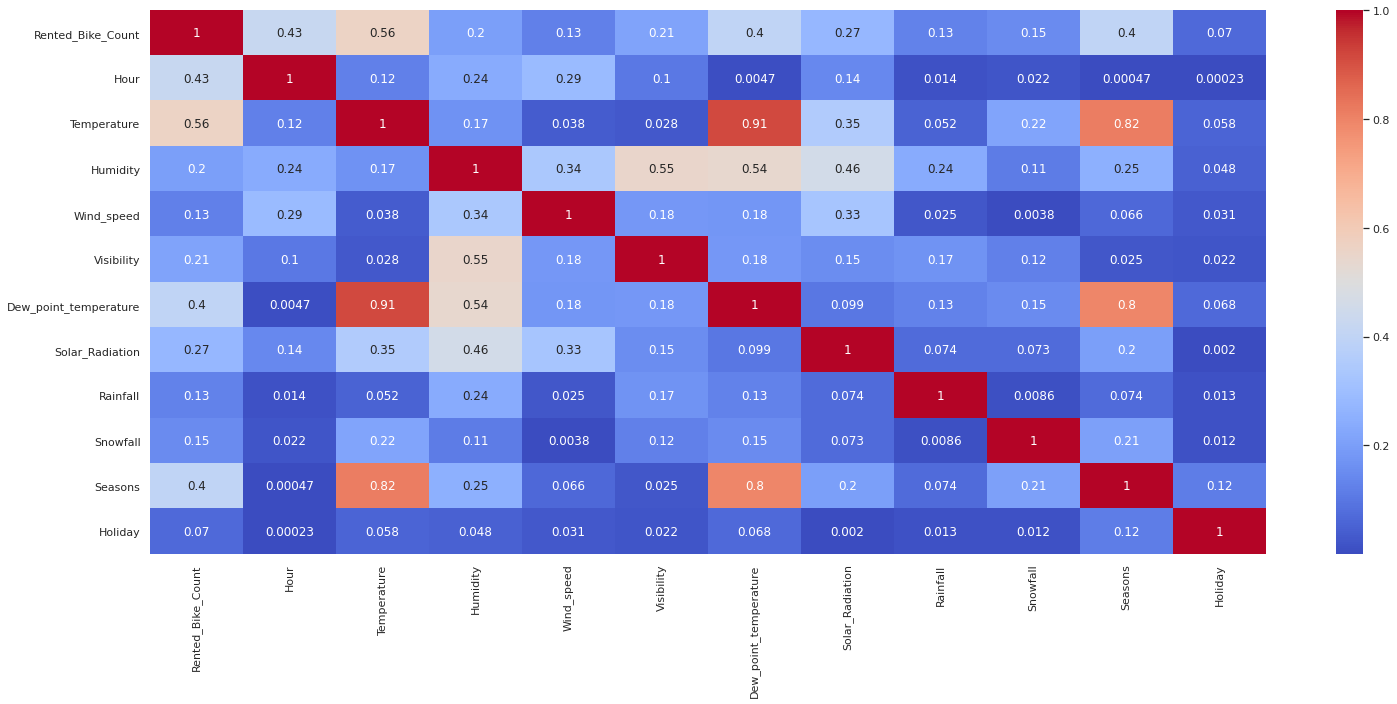

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(SeoulBikeData.corr().abs(),annot=True,cmap='coolwarm')

Identifying the outliers:

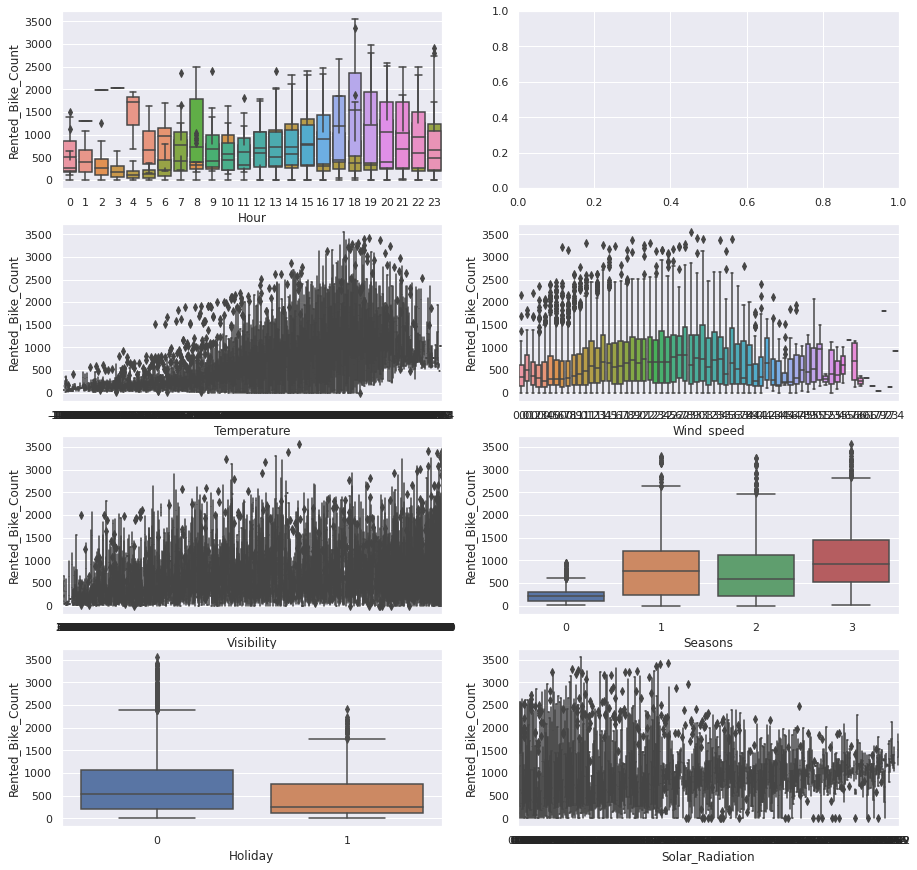

In [ ]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=SeoulBikeData,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])


In [ ]:
# Data for all the independent variables
X = SeoulBikeData.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable
Y = SeoulBikeData['Rented_Bike_Count']


from sklearn.model_selection import train_test_split

Since , Date and Dew_point_temperature shows high correlation with our dependent variable, so dropping these two columns.

In [ ]:
# Data for all the independent variables
SeoulBikeData = SeoulBikeData.drop(labels='Date',axis=1)
SeoulBikeData = SeoulBikeData.drop(labels='Dew_point_temperature',axis=1,)

KeyError: ignored

### **Linear Regression**

In [ ]:
# import libraray
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6348, 10), (2117, 10), (6348,), (2117,))

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

449.33004053728746

In [ ]:
regressor.coef_

array([ 2.82772556e+01,  3.33357396e+01, -7.57490553e+00,  6.55798124e+00,
        2.73253606e-02, -8.56811366e+01, -6.43327747e+01,  1.83131441e+01,
       -9.89525856e+00, -1.27441560e+02])

In [ ]:
y_pred_train=regressor.predict(X_train)

In [ ]:
y_pred=regressor.predict(X_test)

### **Evaluation Matrix**


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
r2_score(Y_test, y_pred)

0.5073055437091121

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.5049660638596776


Text(0, 0.5, 'Predicted')

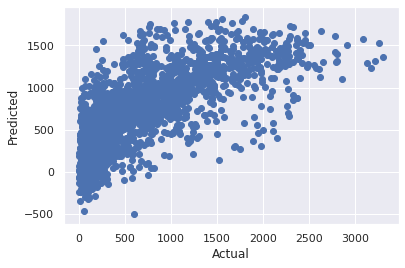

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

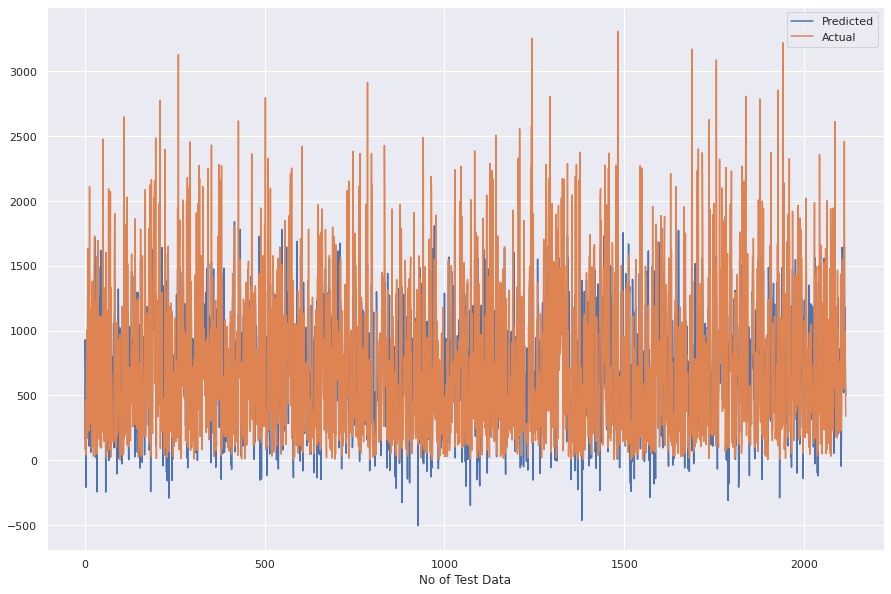

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Lasso Regression**

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.5073052224328767

## **Ridge Rigression**

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha=30)
ridge.fit(X_train,Y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred=ridge.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.5070654634720594

## **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [ ]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=tree.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.7319788682118835

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.7307062132651213


Text(0, 0.5, 'Predicted')

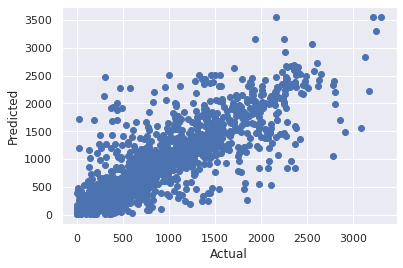

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

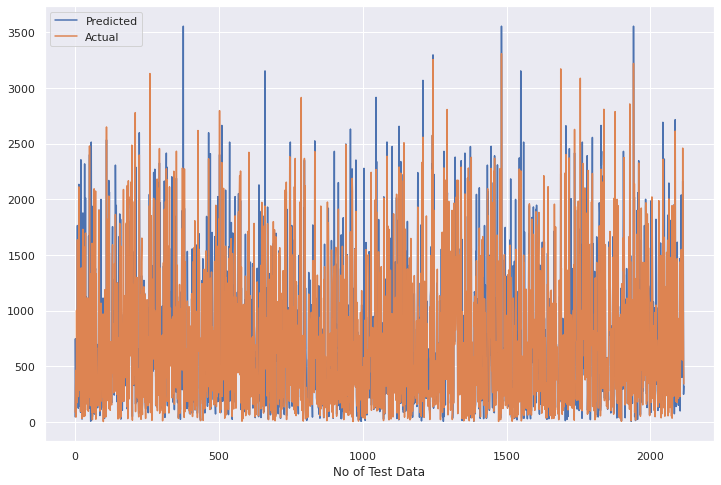

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
tree.feature_importances_

array([0.31865098, 0.35488883, 0.12033297, 0.02102134, 0.01888277,
       0.10117264, 0.02011793, 0.00115215, 0.04178789, 0.00199252])

In [ ]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

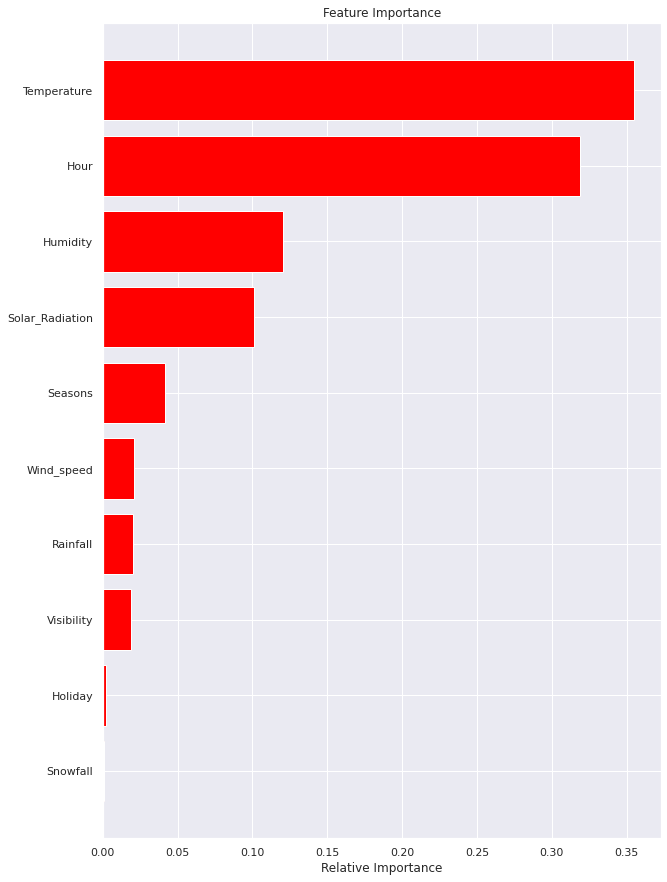

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **GradiantBoosting Algorithm**


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [ ]:
ensemble.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred=ensemble.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.8315838648174348

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8307841680691795


Text(0, 0.5, 'Predicted')

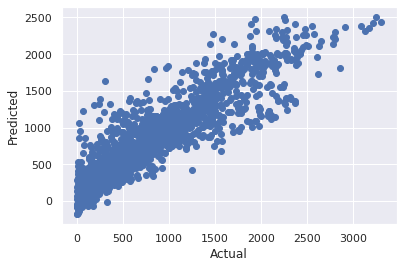

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## **RandomForest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ensemble_regressior = RandomForestRegressor()

In [ ]:
ensemble_regressior.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=ensemble_regressior.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.8538330987273383

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8531390488637454


Text(0, 0.5, 'Predicted')

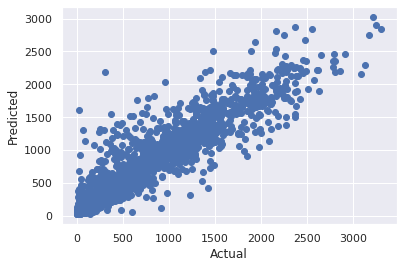

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

XGBoost

In [ ]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, Y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(Y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, Y_train)
test_score = dreg.score(X_test,Y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2



[07:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9669850295574288
Test score: 0.8662260483087465


0.8662260483087465

In [ ]:
adj_r2

0.8657453657658387

### **Grid Search CV on XGboost algorithm**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[07:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   54.1s finished


[07:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,Y_test)

0.9447339650042254

##For Train dataset:


In [ ]:

#Find R-squared value
r2 = r2_score(Y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9447339650042254

In [ ]:
adj_r2

0.9445353806168888

##For Train dataset:

In [ ]:

#Find R-squared value
r2 = r2_score(Y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_train, train_preds))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9485426027944392

In [ ]:
adj_r2

0.9484516886651008

In [ ]:
# import libraries for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
# X = df.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)

###Conclusion:
###Conclusion:
When we compare the root mean squared error and mean absolute error of all the models, the XGBoost model has less root mean squared error and mean absolute error, ending with the accuracy of 94% . So, finally this model is best for predicting the bike rental count on daily basis.
As we can see the total amount of bike rentals increases with the temperature per month. Whereas it seems that the rentals are independent of the wind speed and the humidity, because they are almost constant over the months. This also confirms on the one hand the high correlation between rentals and temperature and on the other hand that nice weather could be a good predictor.So people mainly rent bikes on nice days and nice temperature. This could be important of planning new bike rental stations.

